<a href="https://colab.research.google.com/github/NigamaVeena/TSF-intern/blob/master/Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 5

**import all libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**upload file**

In [53]:
store = pd.read_csv('/SampleSuperstore.csv')
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [54]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [55]:
store.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


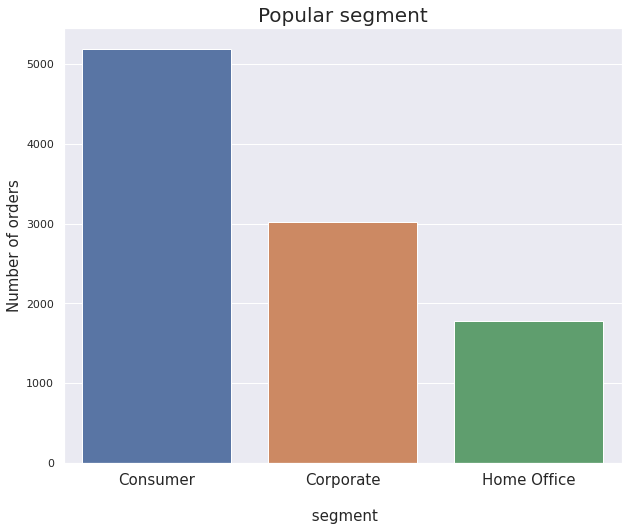

In [56]:
plt.figure(figsize=(10,8))
sns.countplot('Segment',data=store)

plt.title('Popular segment',size=20)
plt.xlabel('\n segment',size=15)
plt.ylabel('Number of orders',size=15)
plt.xticks(fontsize=15);


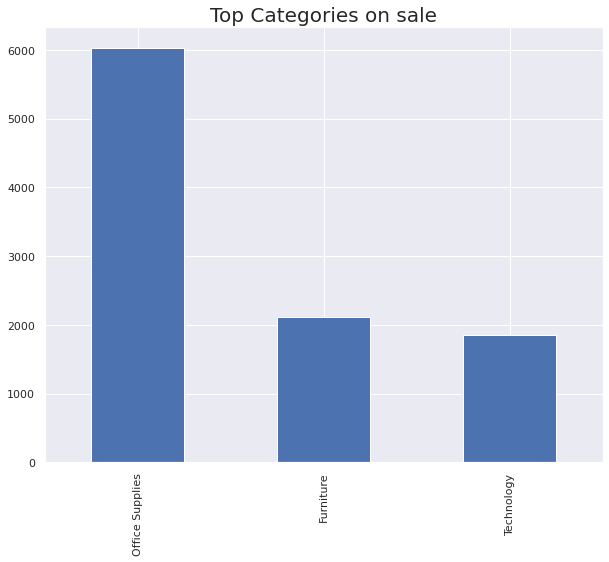

In [57]:
plt.figure(figsize=(10,8))
store.Category.value_counts().plot.bar()
plt.title("Top Categories on sale",size=20);

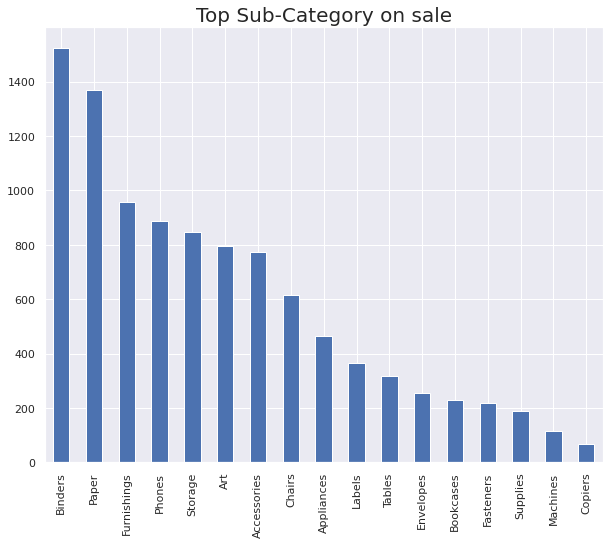

In [58]:
plt.figure(figsize=(10,8))
store["Sub-Category"].value_counts().plot.bar()
plt.title("Top Sub-Category on sale",size=20);

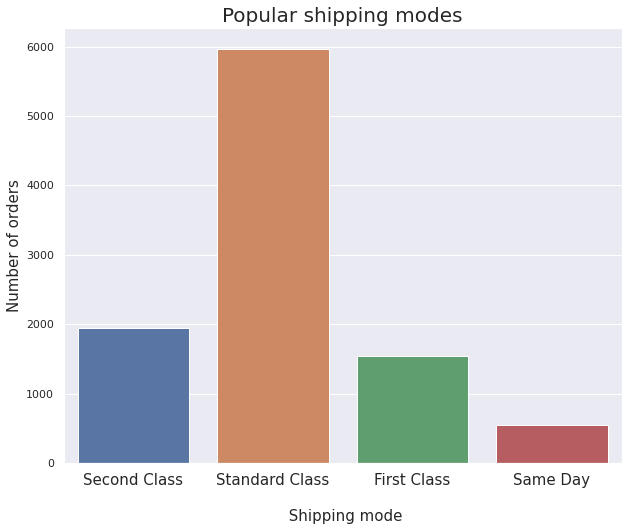

In [59]:
plt.figure(figsize=(10,8))
sns.countplot('Ship Mode',data=store)

plt.title('Popular shipping modes',size=20)
plt.xlabel('\n Shipping mode',size=15)
plt.ylabel('Number of orders',size=15)
plt.xticks(fontsize=15);

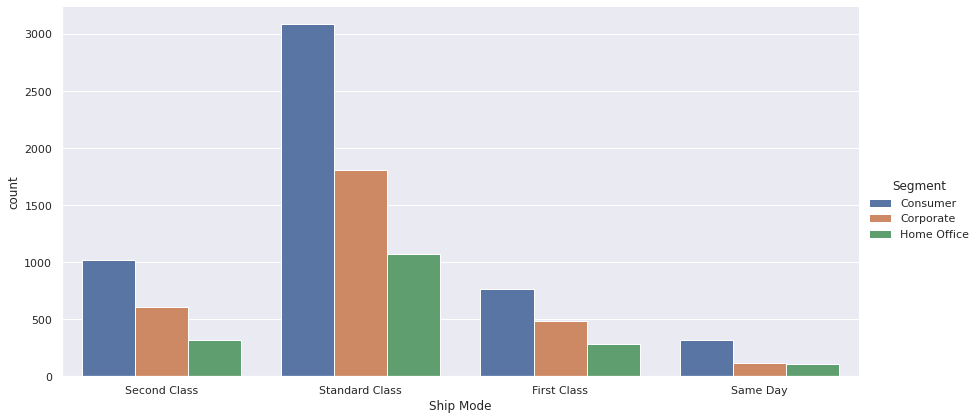

In [60]:
sns.catplot('Ship Mode',data=store,hue='Segment',kind='count',aspect=2,height=6);

In [61]:
store_quant=store.groupby('Segment')['Quantity'].sum().reset_index()

In [62]:
store_quant

,Segment,Quantity
0,Consumer,19521
1,Corporate,11608
2,Home Office,6744


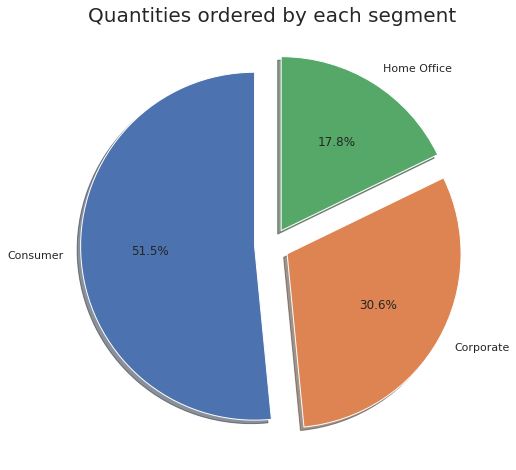

In [63]:
labels=store['Segment'].unique()
plt.figure(figsize=(10,8))
plt.pie(store_quant['Quantity'],autopct='%1.1f%%',labels=labels,shadow=True,explode=(0.1,0.1,0.1),startangle=90)
plt.title('Quantities ordered by each segment',size=20);

In [64]:
store_region=store.groupby('Region')['Quantity'].sum().reset_index()
store_region


,Region,Quantity
0,Central,8780
1,East,10618
2,South,6209
3,West,12266


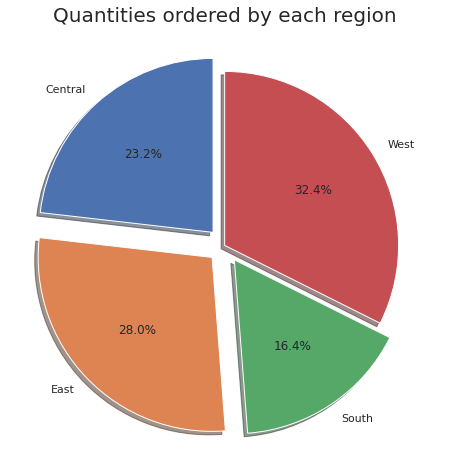

In [65]:
labels=store_region['Region'].unique()
plt.figure(figsize=(10,8))
plt.pie(store_region['Quantity'],autopct='%1.1f%%',labels=labels,shadow=True,explode=(0.1,0.1,0.1,0),startangle=90)
plt.title('Quantities ordered by each region',size=20);

In [66]:
store_top10=store.groupby('City')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=False)
store_top10=store_top10.head(10)
store_top10.reset_index(drop=True,inplace=True)
store_top10

,City,Quantity
0,New York City,3417
1,Los Angeles,2879
2,Philadelphia,1981
3,San Francisco,1935
4,Seattle,1590
5,Houston,1466
6,Chicago,1132
7,Columbus,836
8,San Diego,670
9,Springfield,649


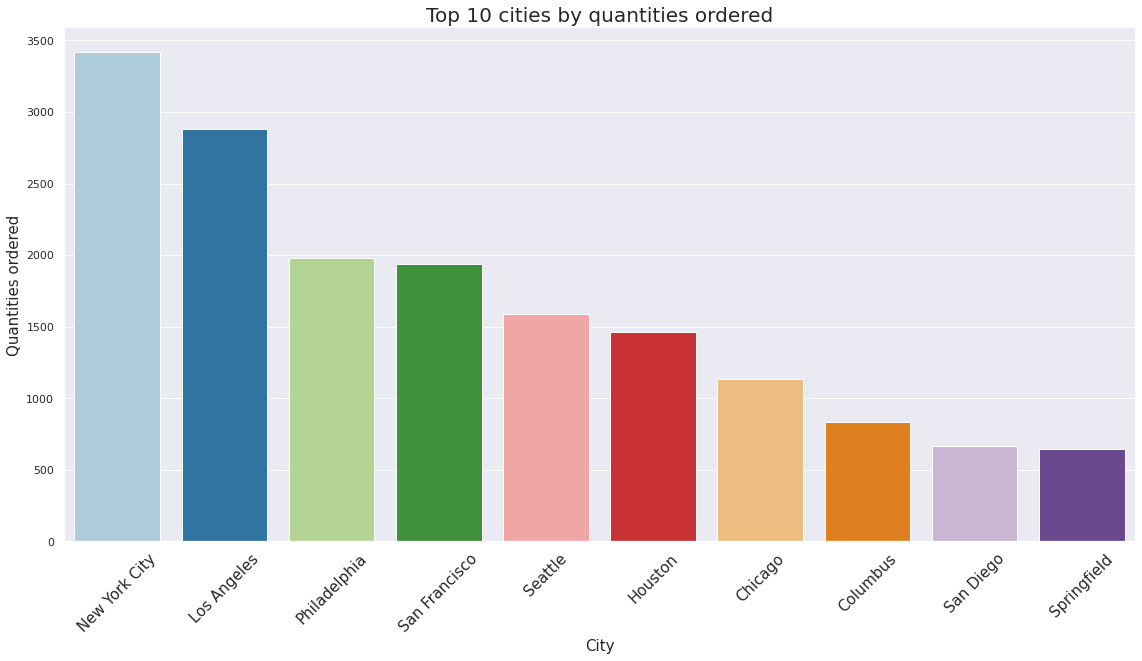

In [67]:
sns.catplot('City','Quantity',data=store_top10,kind='bar',height=8,aspect=2,palette="Paired")
plt.xticks(size=15,rotation=45)
plt.title('Top 10 cities by quantities ordered',size=20)
plt.ylabel('Quantities ordered',size=15)
plt.xlabel('City',size=15);

In [68]:
store_prof=store.groupby('Category')['Profit'].sum().reset_index()
store_prof

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


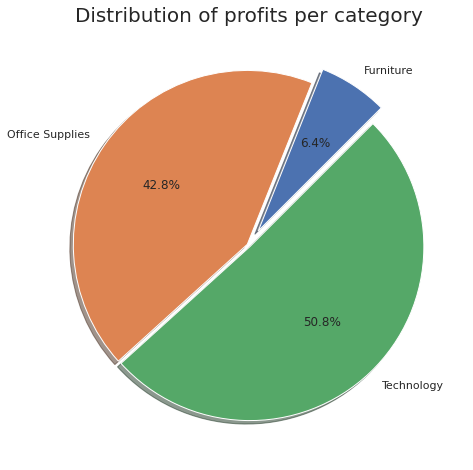

In [69]:
plt.figure(figsize=(10,8))
labels=store_prof['Category'].unique()
plt.pie(store_prof['Profit'],autopct='%1.1f%%',labels=labels,shadow=True,explode=(0.1,0.01,0.01),startangle=45)

plt.title('Distribution of profits per category',size=20);

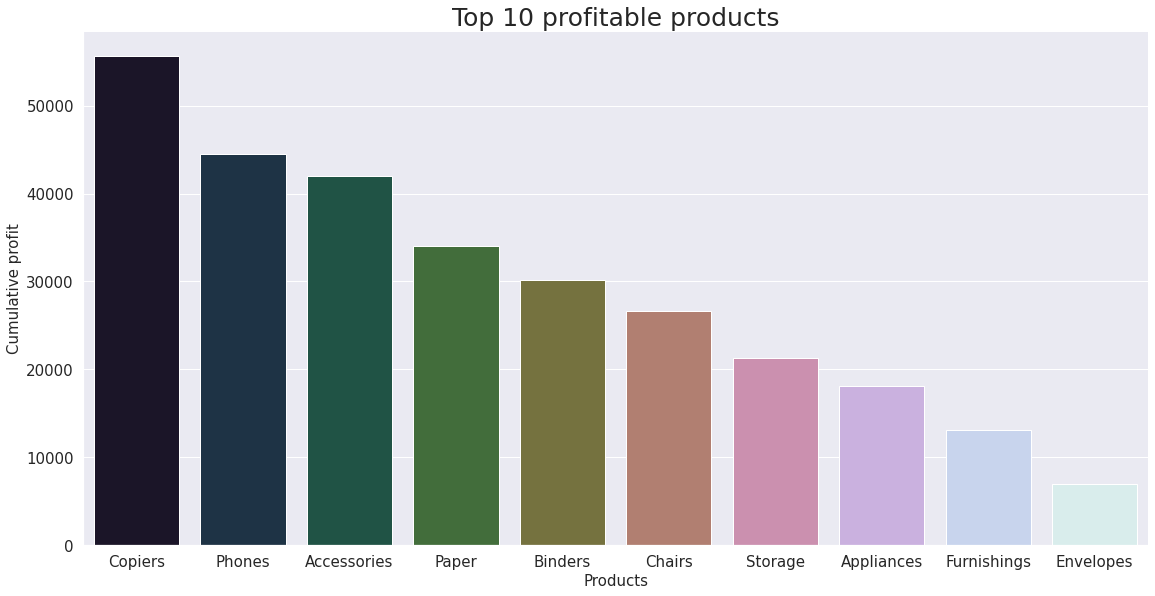

In [70]:
store_top10_items=store.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False).head(10)
sns.catplot('Sub-Category','Profit',data=store_top10_items,kind='bar',aspect=2,height=8,palette="cubehelix")
plt.title('Top 10 profitable products',size=25)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Cumulative profit',size=15)
plt.xlabel('Products',size=15);

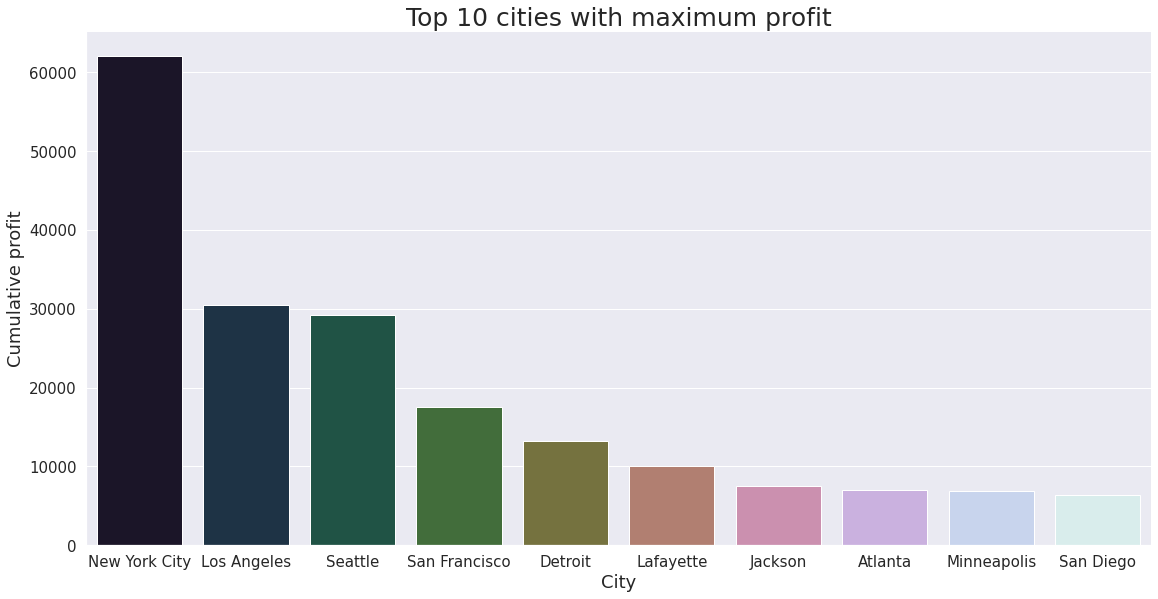

In [71]:
store_top10_cities=store.groupby('City')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False).head(10)
sns.catplot('City','Profit',data=store_top10_cities,kind='bar',aspect=2,height=8,palette="cubehelix")
plt.title('Top 10 cities with maximum profit',size=25)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Cumulative profit',size=18)
plt.xlabel('City',size=18);